[[0]
 [0]
 [0]
 ..., 
 [9]
 [9]
 [9]]


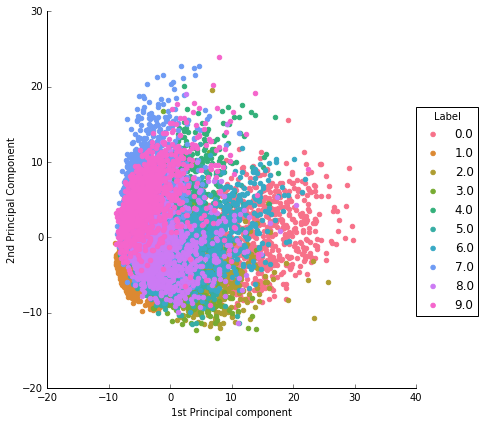

In [41]:
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_pickle('mnist_small_py2_3.pkl')
#print(df['X'].shape)
#print(df['Y'].shape)
scaler = StandardScaler()
standardized_data=scaler.fit_transform(df['X'])
#print(standardized_data)
labels=df['Y']
print(labels)
pca=decomposition.PCA()
pca.n_components=2
pca_data=pca.fit_transform(standardized_data)
#print(pca_data.shape)
#print(pca_data)
pca_data=np.hstack((pca_data,labels))
#print(pca_data.shape)
pca_df=pd.DataFrame(data=pca_data,columns=("1st Principal component","2nd Principal Component","Label"))
#print(pca_df)

sns.FacetGrid(pca_df,hue="Label",size=6).map(plt.scatter,'1st Principal component','2nd Principal Component').add_legend()
plt.show()

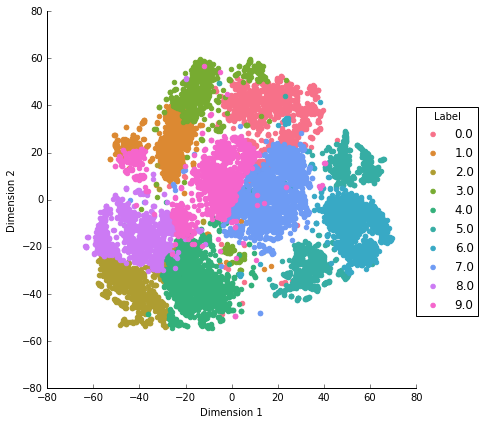

In [57]:
from sklearn.manifold import TSNE
model=TSNE(n_components=2,random_state=0,perplexity=75)
tsne_data=model.fit_transform(standardized_data)
tsne_data1=np.hstack((tsne_data,labels))
tsne_df=pd.DataFrame(data=tsne_data1,columns=("Dimension 1","Dimension 2","Label"))
sns.FacetGrid(tsne_df,hue="Label",size=6).map(plt.scatter,'Dimension 1','Dimension 2').add_legend()
plt.show()

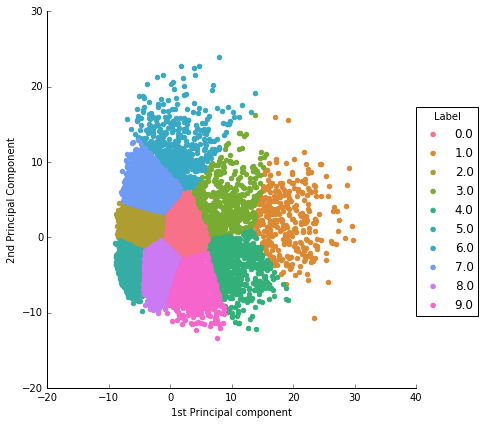

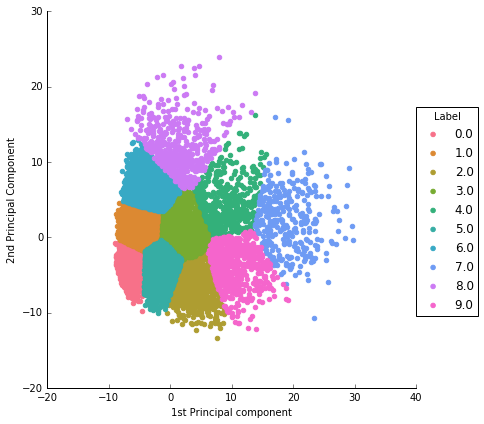

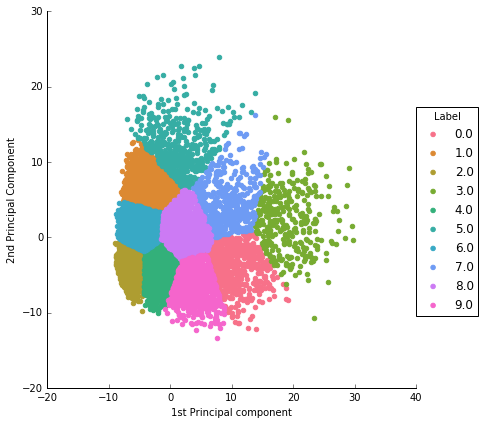

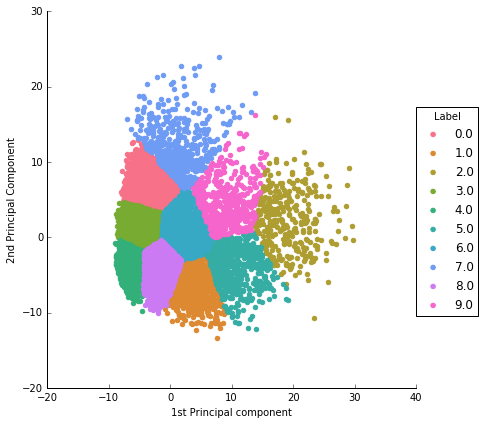

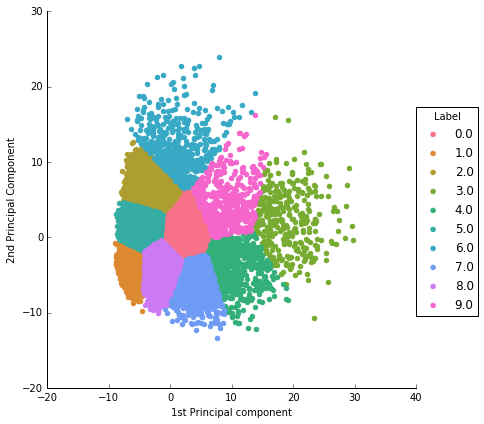

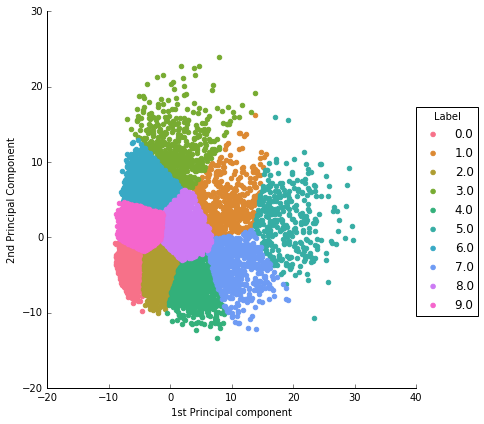

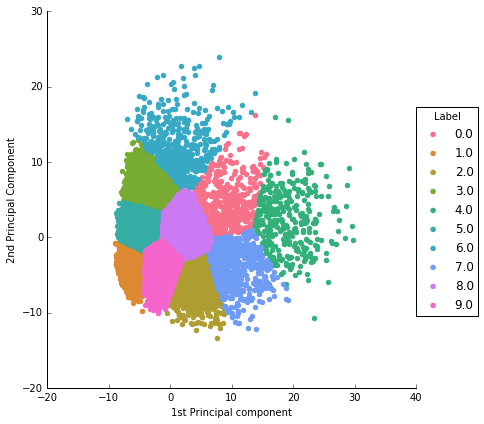

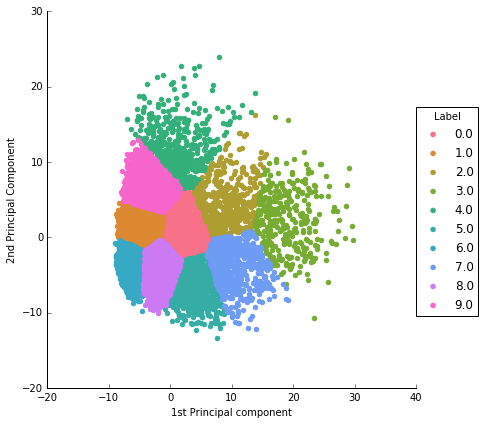

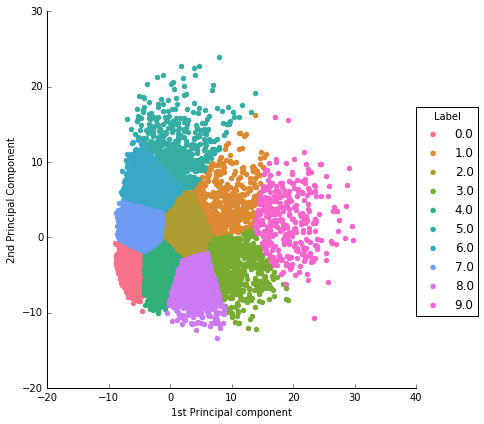

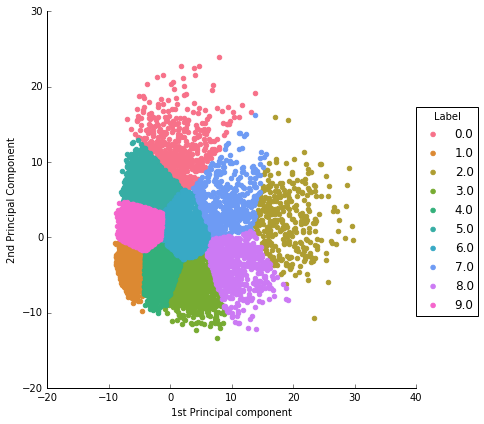

In [64]:
from sklearn.cluster import KMeans
for i in range(10):
    pca_data=pca.fit_transform(standardized_data)
    kmeans = KMeans(init='k-means++', n_clusters=10, n_init=1000,n_jobs=2)
    kmeans.fit(pca_data)
    cluster_labels = kmeans.fit_predict(pca_data)
    labels=cluster_labels.reshape(10000,1)
    pca_data=np.hstack((pca_data,labels))
    #print(pca_data.shape)
    pca_df=pd.DataFrame(data=pca_data,columns=("1st Principal component","2nd Principal Component","Label"))
    #print(pca_df)

    sns.FacetGrid(pca_df,hue="Label",size=6).map(plt.scatter,'1st Principal component','2nd Principal Component').add_legend()
    plt.show()

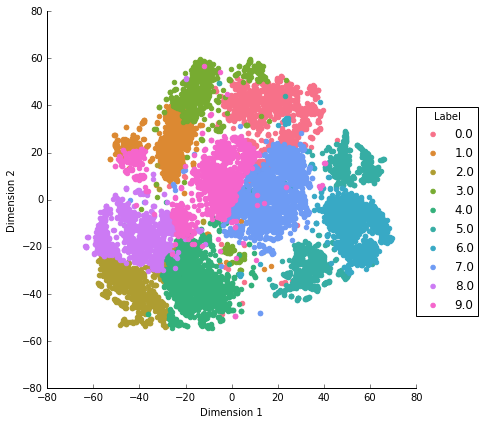

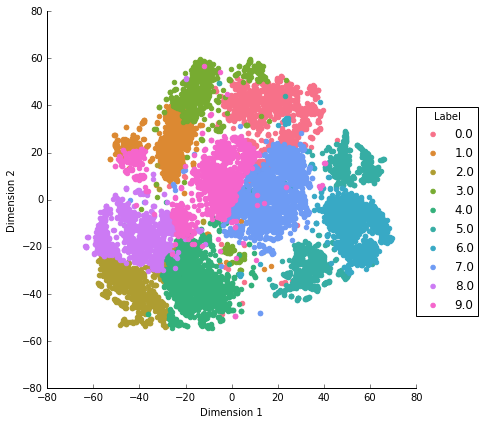

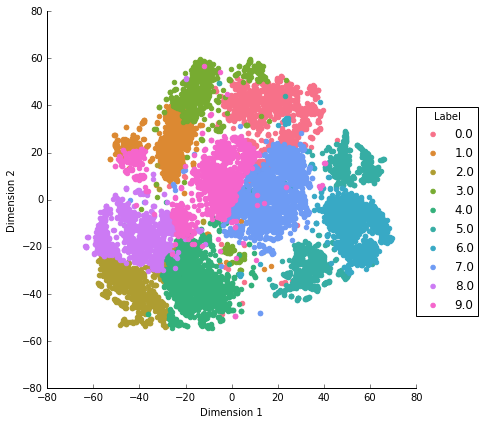

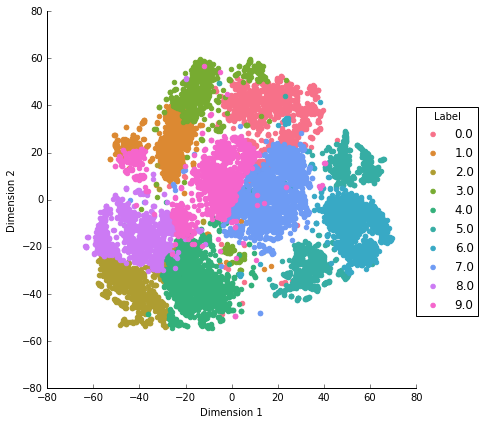

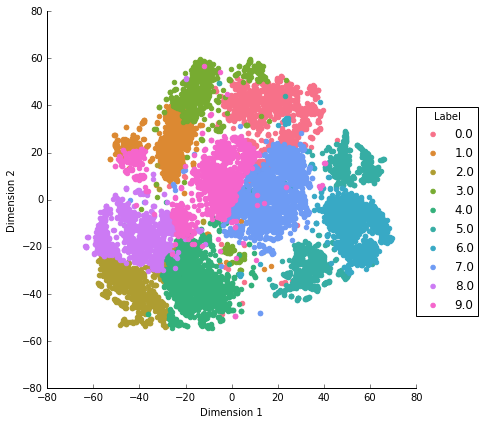

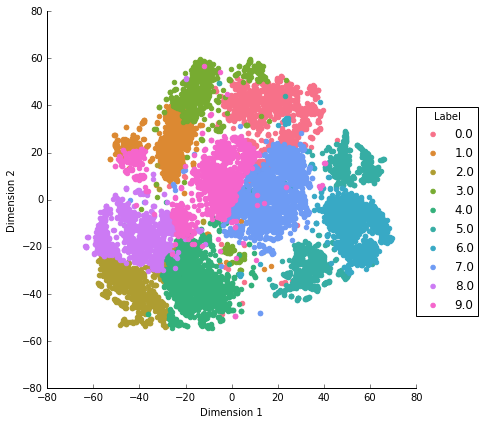

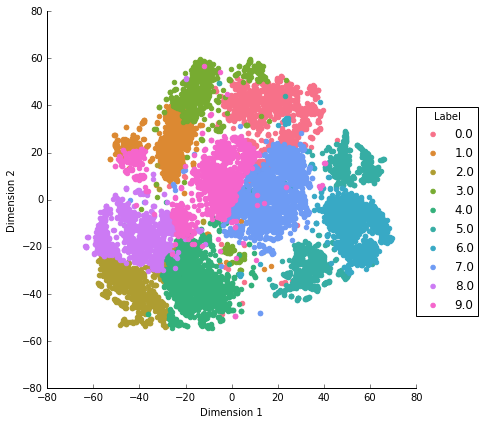

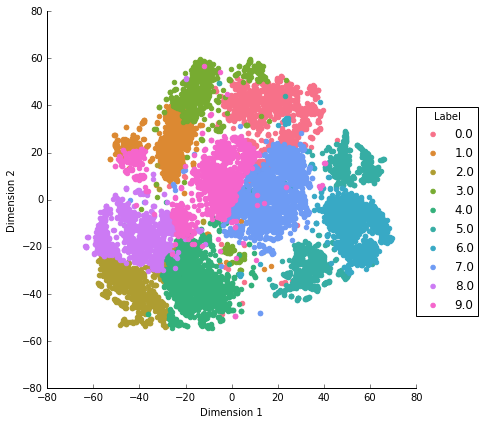

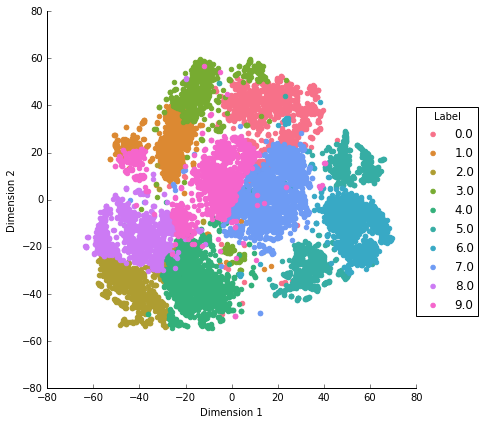

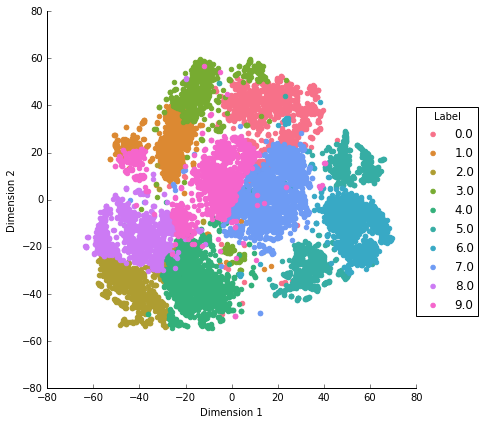

In [65]:
from sklearn.cluster import KMeans
for i in range(10):
    kmeans = KMeans(init='k-means++', n_clusters=10, n_init=10,n_jobs=2)
    kmeans.fit(tsne_data)
    cluster_labels = kmeans.fit_predict(tsne_data)
    labels=cluster_labels.reshape(10000,1)
    tsne_df=pd.DataFrame(data=tsne_data1,columns=("Dimension 1","Dimension 2","Label"))
    sns.FacetGrid(tsne_df,hue="Label",size=6).map(plt.scatter,'Dimension 1','Dimension 2').add_legend()
    plt.show()